In [1]:
import numpy as np

# Invertible matrix

In [2]:
#Matrix Inversion (Gaussian Elimination):
a= np.array([[1,2,3],[1,3,6], [2,0.3,10]])
def inverMatrix(a):
    sha=a.shape
    if sha[0] != sha[1]:
        print("shape error")
        #return None 
    In= np.zeros(sha)
    for i in range(sha[0]): In[i,i] = 1 
    # plug and play solution: In = np.eye(sha[0])
    colsProp=[]
    for j in range(sha[0]):
        at_least_one = False 
        #not_null= np.where(a.T[j][j:]!=0)[0]
        for i in range(j,sha[0]):#not_null:
            if a[i][j]!=0: 
                at_least_one = True 
                colsProp.append(i)
                cte= a[i][j]
                a[i]=a[i]/cte
                In[i] = In[i]/cte
                for k in range(j,sha[0]):#not_null:
                    if k!=i:
                        cte= a[i][j]
                        a[k]=a[k]/cte
                        In[k]=In[k]/cte
                        cte= a[k][j]
                        a[k]= a[k]-a[i]*cte
                        In[k]= In[k]-In[i]*cte
    
            
        if not at_least_one : 
            print("matrix not inversible")
    
    for i in range(sha[0]-2,-1,-1):
    
        s1=np.zeros(sha[0])
        s2=np.zeros(sha[0])
        for j in range(i+1,sha[0]):
            s1=s1+a[j]*a[i][j]
            s2=s2+In[j]*a[i][j]
        a[i]= a[i]-s1
        In[i]= In[i]-s2
    
    #print(a  )
    #print("-"*10)
    #print(In)
    #print("-"*10)
    #print(np.linalg.inv(np.array([[1,2,3],[1,3,6], [2,0.3,10]])))
    return In
inverMatrix(a)

array([[ 1.86754967, -1.26490066,  0.1986755 ],
       [ 0.13245033,  0.26490066, -0.1986755 ],
       [-0.37748344,  0.24503311,  0.06622517]])

In [3]:
print(np.linalg.inv(np.array([[1,2,3],[1,3,6], [2,0.3,10]])))

[[ 1.86754967 -1.26490066  0.1986755 ]
 [ 0.13245033  0.26490066 -0.1986755 ]
 [-0.37748344  0.24503311  0.06622517]]


## the full solution

In [4]:
import numpy as np

def inverMatrix2(a):
    sha = a.shape
    
    # Check if the matrix is square
    if sha[0] != sha[1]:
        print("Shape error: matrix is not square")
        return None
    
    # Create the identity matrix of the same size
    In = np.eye(sha[0])

    # Forward elimination
    for j in range(sha[0]):
        if a[j, j] == 0:
            # Swap rows if pivot is zero (find first non-zero element)
            non_zero_row = np.where(a[j:, j] != 0)[0]
            if len(non_zero_row) == 0:
                print("Matrix is singular and cannot be inverted.")
                return None
            
            row_to_swap = non_zero_row[0] + j
            a[[j, row_to_swap]] = a[[row_to_swap, j]]
            In[[j, row_to_swap]] = In[[row_to_swap, j]]
        
        # Normalize the pivot row (make the pivot element equal to 1)
        pivot = a[j, j]
        a[j] = a[j] / pivot
        In[j] = In[j] / pivot
        
        # Eliminate elements below the pivot
        for i in range(j + 1, sha[0]):
            if a[i, j] != 0:
                factor = a[i, j]
                a[i] = a[i] - factor * a[j]
                In[i] = In[i] - factor * In[j]
    
    # Backward substitution
    for i in range(sha[0] - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            if a[j, i] != 0:
                factor = a[j, i]
                a[j] = a[j] - factor * a[i]
                In[j] = In[j] - factor * In[i]
    
    return In

# Test the function with a matrix
a = np.array([[1, 2], [1, 3]])
inv_a = inverMatrix(a)
print("Inverse of a:")
print(inv_a)

# Another example with a 3x3 matrix
a = np.array([[1, 2, 3], [1, 3, 6], [2, 0.3, 10]])
inv_a = inverMatrix(a)
print("\nInverse of a:")
print(inv_a)


Inverse of a:
[[ 3. -2.]
 [-1.  1.]]

Inverse of a:
[[ 1.86754967 -1.26490066  0.1986755 ]
 [ 0.13245033  0.26490066 -0.1986755 ]
 [-0.37748344  0.24503311  0.06622517]]


In [5]:
a= np.array([[1,2,3],[1,3,6], [2,0.3,10]])
print(inverMatrix(a))

a= np.array([[1,2,3],[1,3,6], [2,0.3,10]])
inverMatrix2(a)

[[ 1.86754967 -1.26490066  0.1986755 ]
 [ 0.13245033  0.26490066 -0.1986755 ]
 [-0.37748344  0.24503311  0.06622517]]


array([[ 1.86754967, -1.26490066,  0.1986755 ],
       [ 0.13245033,  0.26490066, -0.1986755 ],
       [-0.37748344,  0.24503311,  0.06622517]])

In [6]:
np.random.seed(0)
a= np.random.uniform(1,10,(5,5))
print(a)
print("="*10)
print(inverMatrix(a))
print("="*10)
np.random.seed(0)
a= np.random.uniform(1,10,(5,5))
print(inverMatrix2(a))

print("="*10)
np.random.seed(0)
a= np.random.uniform(1,10,(5,5))
print(np.linalg.inv(a))

[[5.93932154 7.4367043  6.42487038 5.90394865 4.81289319]
 [6.81304702 4.9382849  9.02595701 9.67296484 4.45097367]
 [8.12552534 5.76005428 6.11240105 9.33036974 1.63932452]
 [1.7841637  1.18196558 8.49357861 8.00341076 8.83010933]
 [9.80756508 8.19242708 5.15331426 8.02476259 2.06446983]]
[[-0.56169366  0.56315322 -0.95386949  0.00282584  0.84067134]
 [ 0.51473565 -0.44431106  0.60847212 -0.05324607 -0.49749599]
 [-0.00706046  0.66334303 -0.43182312 -0.23735648 -0.05558774]
 [ 0.1986192  -0.62926069  0.8951445   0.14836878 -0.45176495]
 [-0.1286404  -0.12202811 -0.28468722  0.21363755  0.35967019]]
[[-0.56169366  0.56315322 -0.95386949  0.00282584  0.84067134]
 [ 0.51473565 -0.44431106  0.60847212 -0.05324607 -0.49749599]
 [-0.00706046  0.66334303 -0.43182312 -0.23735648 -0.05558774]
 [ 0.1986192  -0.62926069  0.8951445   0.14836878 -0.45176495]
 [-0.1286404  -0.12202811 -0.28468722  0.21363755  0.35967019]]
[[-0.56169366  0.56315322 -0.95386949  0.00282584  0.84067134]
 [ 0.51473565 

In [7]:
np.random.seed(0)
a= np.random.randint(1,10,(5,5))
print(a)
print("="*10)
print(inverMatrix(a))
print("="*10)
np.random.seed(0)
a=np.random.randint(1,10,(5,5))
print(inverMatrix2(a))

print("="*10)
np.random.seed(0)
a=np.random.randint(1,10,(5,5))
print(np.linalg.inv(a))

[[6 1 4 4 8]
 [4 6 3 5 8]
 [7 9 9 2 7]
 [8 8 9 2 6]
 [9 5 4 1 4]]
[[-0.0162037  -0.0625      0.01388889 -0.125       0.25      ]
 [-0.11111111  0.16666667  0.          0.          0.        ]
 [-0.01851852 -0.16666667  0.11111111  0.          0.        ]
 [ 0.04398148  0.14583333 -0.51388889  0.625      -0.25      ]
 [ 0.18287037  0.0625     -0.01388889  0.125      -0.25      ]]
[[-0.0162037  -0.0625      0.01388889 -0.125       0.25      ]
 [-0.11111111  0.16666667  0.          0.          0.        ]
 [-0.01851852 -0.16666667  0.11111111  0.          0.        ]
 [ 0.04398148  0.14583333 -0.51388889  0.625      -0.25      ]
 [ 0.18287037  0.0625     -0.01388889  0.125      -0.25      ]]
[[ 0.00450741 -0.00708307 -0.18158403  0.11526079  0.1500322 ]
 [-0.16548616  0.11719253  0.09529942 -0.08886027  0.06310367]
 [ 0.05408886 -0.08499678 -0.17900837  0.38312943 -0.19961365]
 [-0.10946555  0.31487444 -1.01867354  1.05795235 -0.21506761]
 [ 0.16999356 -0.1242756   0.72311655 -0.79587894 

# det(A)

https://fr.wikipedia.org/wiki/Calcul_du_d%C3%A9terminant_d%27une_matrice

In [9]:
def myMinorAij(a,i,j):
    N,_=a.shape
    indexi = list(set(range(N))-{i})
    indexj = list(set(range(N))-{j})
    Aij= a[indexi].T[indexj].T
    return Aij
np.random.seed(0)
N= 3
a= np.random.randint(0,10,size= (N,N))
print(a)
i,j=1,1
myMinorAij(a,i,j)

[[5 0 3]
 [3 7 9]
 [3 5 2]]


array([[5, 3],
       [3, 2]])

In [10]:
def mydet(a):
    N,_=a.shape
    i=0
    if N==1:
        return a[0][0]
    det = np.sum([(-1)**(i+j)*a[i][j]*mydet(myMinorAij(a,i,j)) for j in range(N)])
    return det

a_1= np.linalg.inv(a)
np.linalg.det(a), mydet(a), mydet(a_1), 1/mydet(a)

(np.float64(-172.99999999999991),
 np.int64(-173),
 np.float64(-0.005780346820809249),
 np.float64(-0.005780346820809248))

# Inverce matrix with adjoint methode 

## Cofactor matrix

In [11]:
def mycofactorMatrix (a):
    N,_=a.shape

    C=np.zeros((N,N))
    for i in range(N):
        for j in range(N): 
            Aij = myMinorAij(a,i,j)
            C[i][j]=(-1)**(i+j)*mydet(Aij)      
    return C

print(mycofactorMatrix (a))  

[[-31.  21.  -6.]
 [ 15.   1. -25.]
 [-21. -36.  35.]]


## Adjugate matrix

In [12]:
def adjugate_matrix(a): 
    return mycofactorMatrix (a).T
adjugate_matrix(a)

array([[-31.,  15., -21.],
       [ 21.,   1., -36.],
       [ -6., -25.,  35.]])

## Inverse of matrix with adjugate methode

In [13]:
def inverse_with_adj(a): 
    deta=mydet(a)
    if deta==0:
        return None 
    return (1/deta)*adjugate_matrix(a)
print(inverse_with_adj(a))
print("-"*40)
print(np.linalg.inv(a))

[[ 0.17919075 -0.0867052   0.12138728]
 [-0.12138728 -0.00578035  0.20809249]
 [ 0.03468208  0.14450867 -0.20231214]]
----------------------------------------
[[ 0.17919075 -0.0867052   0.12138728]
 [-0.12138728 -0.00578035  0.20809249]
 [ 0.03468208  0.14450867 -0.20231214]]


## CPU time benchmark 

In [14]:
np.random.seed(0)
N= 6
a= np.random.randint(0,10,size= (N,N))

In [15]:
%%time 
a_11=np.linalg.inv(a)

CPU times: user 0 ns, sys: 121 μs, total: 121 μs
Wall time: 124 μs


In [16]:
%%time 
a_12=inverse_with_adj(a)

CPU times: user 64 ms, sys: 1.2 ms, total: 65.3 ms
Wall time: 66.2 ms


In [17]:
np.linalg.norm(a_11-a_12)

np.float64(1.2264090309571642e-16)

# Norm

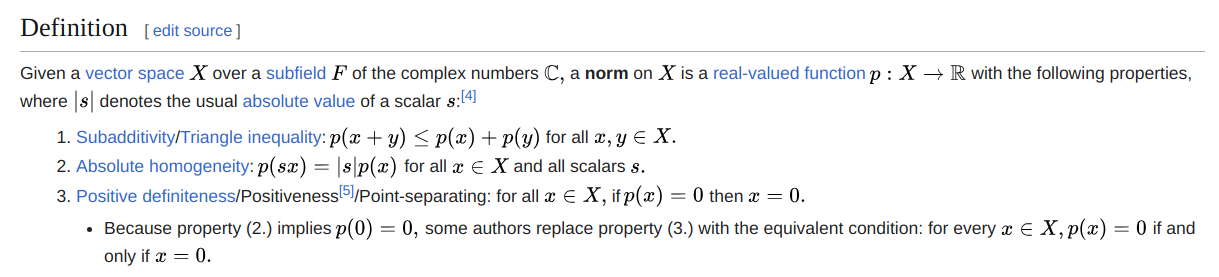

https://fr.wikipedia.org/wiki/Norme_matricielle
<br>
https://en.wikipedia.org/wiki/Matrix_norm

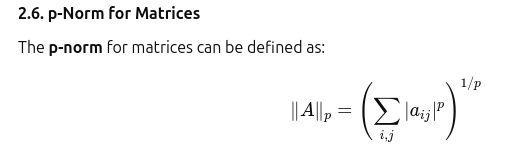

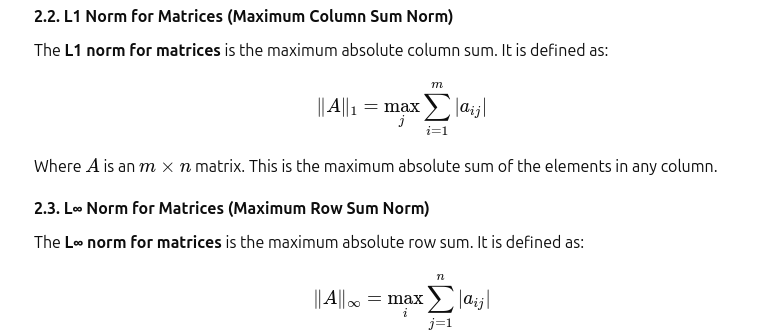

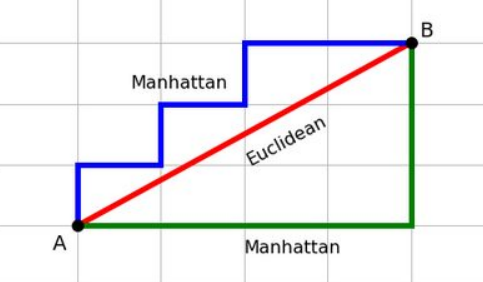

In [18]:
# for real matrix 
def mynorm( a, wich ="Frobenius"): 
    if wich == "Frobenius": # Euclidien
        return np.sqrt((a**2).sum())
    if wich ==1: # Manhattan Norm
        return np.max([a.sum(axis=0)])
    if wich == np.inf:
        return np.max([a.sum(axis=1)])
    elif wich>0: 
        return np.power((np.abs(a)**wich).sum(),1/wich)
        
mynorm( a), np.linalg.norm(a), np.linalg.norm(a, ord="fro"), np.linalg.norm(a, ord=2)

(np.float64(32.341923257592455),
 np.float64(32.341923257592455),
 np.float64(32.341923257592455),
 np.float64(30.055983715915374))

In [19]:
print(a)
print("Frobenius", np.linalg.norm(a, ord="fro"))
print("L2: ", np.linalg.norm(a, ord=2))

[[5 0 3 3 7 9]
 [3 5 2 4 7 6]
 [8 8 1 6 7 7]
 [8 1 5 9 8 9]
 [4 3 0 3 5 0]
 [2 3 8 1 3 3]]
Frobenius 32.341923257592455
L2:  30.055983715915374


In [20]:
mynorm(a, wich=1), np.linalg.norm(a, ord=1)

(np.int64(37), np.float64(37.0))

In [21]:
mynorm(a, wich=np.inf), np.linalg.norm(a, ord=np.inf)

(np.int64(40), np.float64(40.0))

In [22]:
mynorm(a, wich=2), np.linalg.norm(a, ord=2)

(np.float64(32.341923257592455), np.float64(30.055983715915374))

## L2 vs Frobenius
<br>
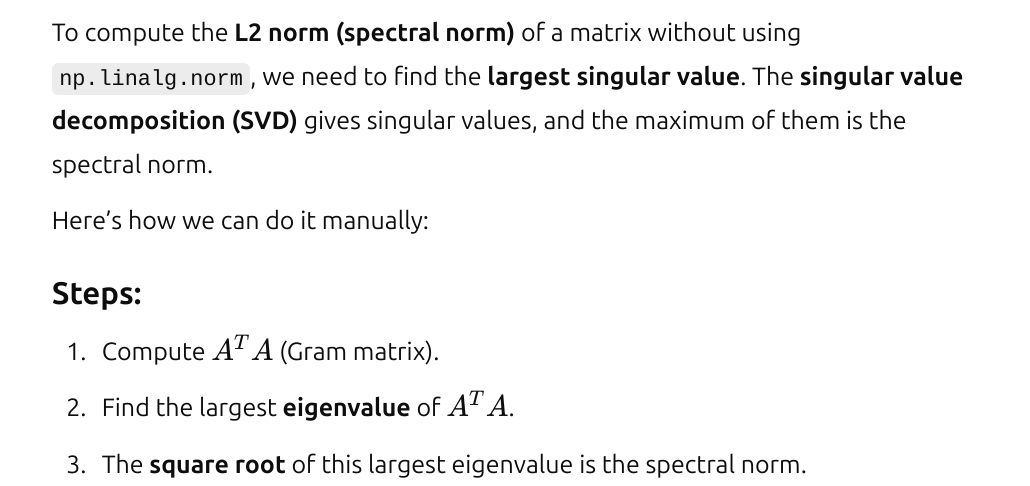

In [23]:
import numpy as np

def l2_norm_manual(A):
    """Compute the spectral norm (largest singular value) of a matrix A."""
    # Compute A^T A
    ATA = A.T @ A
    
    # Compute eigenvalues
    eigenvalues = np.linalg.eigvals(ATA)
    
    # The spectral norm is the sqrt of the largest eigenvalue
    spectral_norm = np.sqrt(max(eigenvalues.real))  # Only real part to avoid small numerical imag parts
    
    return spectral_norm

l2_norm_manual(a) , np.linalg.norm(a, ord=2)


(np.float64(30.055983715915364), np.float64(30.055983715915374))

# eigenvalues
**delt(A- λ.I) = 0**

In [33]:
np.random.seed(0)
N = 3
a= np.random.randint(1,10,(N,N))
a

array([[6, 1, 4],
       [4, 8, 4],
       [6, 3, 5]])

In [38]:
In = np.zeros((N,N))
for i in range (N): 
    In[i][i] = 1 
# Or In =np.identity(N)
In

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
mydet(a)

np.int64(28)

**I propose to use dichotomique (binary search) to find the eigenvalues**

In [97]:
np.random.seed(0)
x0= np.random.uniform(-100,100,100)
x0.sort()
checks = np.array([mydet(a-x*In) for x in x0])
checks[:10]

array([1166293.82937938, 1074967.7594805 , 1066681.31120548,
       1065986.1853827 ,  951421.07043944,  834298.63122699,
        813584.67924904,  778036.94255387,  699050.89964661,
        667297.30845486])

In [98]:
index_inv_signs= list([[i, i+1] for i in range(len(checks)-1) if checks[i]*checks[i+1] <= 0])
index_inv_signs[:5]

[[50, 51], [52, 53], [55, 56]]

In [99]:
# dichotomique algo
# Binary search
def dichotomique(func, xl, xr, N=10):
    if func(xl)  == 0: 
        return xl
    if func(xr) ==0: 
        return xr
    for i in range(N):
        xm= (xr+xl)/2
        if func(xm) == 0:
            return xm
        if func(xm)*func(xr) < 0:
            xl= xm
        else : 
            xr = xm
    return xm
# test 
print (f"expected            {np.pi}") 
sol = dichotomique(np.sin,  xl=np.pi/2, xr= 3*np.pi/2, N=10)
print (f"dichotomique N= 10  {sol}")
sol = dichotomique(np.sin,  xl=np.pi/2, xr= 3*np.pi/2, N=100)
print (f"dichotomique N= 100 {sol}")

expected            3.141592653589793
dichotomique N= 10  3.1446606151655643
dichotomique N= 100 3.141592653589793


In [100]:
def func(x):
    return mydet(a-x*In)
func(0)

np.float64(28.0)

In [101]:
lambdas = []
for v in index_inv_signs: 
    i = v [0]
    xl= x0[i]# left
    xr= x0[i+1]# right
    sol = dichotomique(func,  xl=xl, xr= xr, N=100)
    lambdas.append(sol)
    

In [102]:
lambdas = np.array(list(set(lambdas)))
lambdas.sort()
lambdas

array([ 0.3964637 ,  5.31447364, 13.28906266])

In [103]:
nplambdas,npvecs=np.linalg.eig(a)
nplambdas.sort()
nplambdas

array([ 0.3964637 ,  5.31447364, 13.28906266])

In [104]:
for l in lambdas: 
    print(l, mydet(a-l*In))

0.39646369534204107 2.842170943040401e-14
5.314473642331482 3.197442310920451e-14
13.28906266232648 -1.7053025658242404e-13
